### *Veriyi Hazırlama (Encoding)*

Makine Öğrenmesi modelleri matematikseldir, kelimelerden anlamaz. Bunun için "Kırmızı", "Mavi" yazısını sayıya çevirmemiz lazım. Burada iki yöntem vardır:

#### Label Encoding

- Nedir? Her kategoriye bir sıra numarası verir. (Küçük -> 0, Orta -> 1, Büyük -> 2)
- Ne Zaman Kullanırız? Eğer veride sıralama/hiyerarşi varsa (Örn: Eğitim Seviyesi -> İlkokul < Lise < Üniversite)
- Tehlikesi ise eğer Elma, Armut, Muz için kullanırsak, makine o zaman Muz(2), Elma(0)'dan büyük sanır ve yanlıştır.

#### One-Hot Encoding

- Nedir? Her kategori için yeni bir sütun açar ve sadece o kategoriye 1 yazar.
- Ne Zaman Kullanırız? Sıralamanın önemsiz olduğu durumlarda (Renkler, Şehirler, Markalar)
- Gelecekte derin öğrenme ve NLP için kelimeleri matrise çevirirken bu mantık kullanılır.

### *Model (Random Forest)*

- Nedir? Adı üzerinde "Rastgele Orman". Tek bir Karar Ağacı (Decision Tree) bazen veriyi ezberler (Overfitting). RF, 100 tane ağaç kurar. Her biri farklı bir şeye bakar ve oy çokluğuyla karar verir.
- Ağaçların %80'i Phishing dedi, %20'si Güvenli dedi. O zaman sonuç Phishing.
- Neden Kullanılır? Çok sağlamdır, kolay kolay hata yapmaz ve ayar gerektirmez.
- Topluluk Modellerinden biridir.

#### *Karne (Metrikler ve Confusion Matrisi)*
Modeli eğittikten sonra birçok metriğe bakarız ki modelimizin çalışma oranı nasıldır diye?

##### 1. Confusion Matrix (Karmaşıklık Matrisi)
Bu bir tablodur. 4 ihtimal vardır.
- TP (True Positive): Hırsızı yakaldın. (Doğru)
- TN (True Negative): Suçsuzu bıraktın. (Doğru)
- FP (False Positive): Masum adama "Hırsız" dedin. (Yalancı Alarm - Tip 1 Hata)
- FN (False Negative): Hırsızı kaçırdın. (En Tehlikelisi - Tip 2 Hata)

![image](confusion-Matrix.PNG)
![image](predicted_condition_2_.webp)


##### 2. HeatMap (Isı Haritası)
Confusion Matrix'in renklendirilmiş hali diyebiliriz. Nerede hata yaptığını (Koyu renkli kareler) gözle hemen görmeni sağlar.

![image](heatmap.jpg)

##### 3. Accuracy (Doğruluk)
- Formül: Doğru Bildiklerim / Hepsi
- Tuzak şudur misal sen 100 veriden 99'unu bildin model hepsine güvenli derse bilme oranı %99 Accuracy çıkar ama virüsü yakalayamaz
- Dengesiz verilerde kullanma!

##### 4. Precision (Kesinlik)
- Soru şudur "Hırsız" dediklerimin kaçı gerçekten hırsız?
- Ne Zaman Önemli? Masum insanları suçlamak istemiyorsan (Örn: Spam filtresi, önemli mailin spama düşmemeli.)

##### 5. Recall (Duyarlılık/Yakalama)
- Soru şudur gerçek hırsızların yüzde kaçını yakaladım?
- Ne Zaman Önemli? Siber Güvenlik, Sağlık gibi alanlarda. Eğer virüs veya kanserli hücre varsa kaçırmaman lazım ama yanlış alarm verse de sorun değil sadece kaçırma!

##### 6. F1-Score 
- Precision ile Recall'ın ortalamasıdır. İkisinin dengeli olmasını istersen buna bakarız.

##### 7. AUC-ROC(Area Under Curve)
- Nedir? Modelin ayrıştırma yeteneğidir.
    - 0.5 -> Yazı tura atıyor (Çöp)
    - 1.0 -> Mükemmel ayrıştırıyor.
    - Genelde 0.80 üzeri iyi deriz.


Örnek : Cinsiyet, Şehir, Label, Maaş değişkenleriyle birlikte gitme ve kalmayı tahmin eden RF modeli

Label Encoding Sonucu: (Erkek: 0, Kadin: 1)
  Cinsiyet  Cinsiyet_Encoded
0    Erkek                 0
1    Kadin                 1
2    Kadin                 1
3    Erkek                 0
4    Kadin                 1
5    Erkek                 0
6    Kadin                 1
7    Erkek                 0

One-Hot Encoding Sonucu: (Şehir sütunları)
  Cinsiyet  Maas  Label  ...  Sehir_Bursa  Sehir_Istanbul  Sehir_Izmir
0    Erkek  5000      1  ...        False            True        False
1    Kadin  6000      0  ...        False           False        False
2    Kadin  5500      0  ...        False           False         True
3    Erkek  7000      1  ...         True           False        False
4    Kadin  6500      0  ...        False           False        False
5    Erkek  5200      1  ...        False            True        False
6    Kadin  6200      0  ...        False           False        False
7    Erkek  5800      1  ...        False           False         True

[8 rows x 9

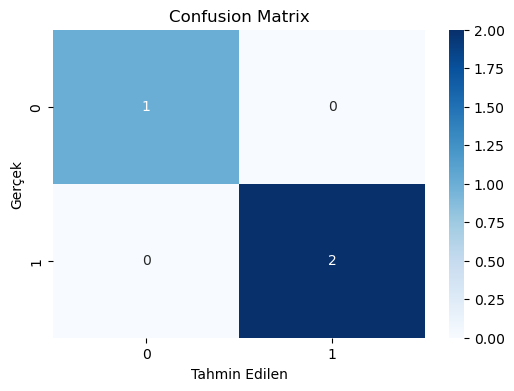

Accuracy (Doğruluk): 1.00
Precision (Kesinlik): 1.00
Recall (Duyarlılık): 1.00
F1 Score: 1.00
AUC - ROC: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import alpha
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import (
    confusion_matrix, 
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
)

# Hayali bir veri seti oluşturalım.
data = {
    'Sehir': ['Istanbul', 'Ankara', 'Izmir', 'Bursa', 'Antalya', 'Istanbul', 'Ankara', 'Izmir'],
    'Cinsiyet': ['Erkek', 'Kadin', 'Kadin', 'Erkek', 'Kadin', 'Erkek', 'Kadin', 'Erkek'],
    'Maas': [5000, 6000, 5500, 7000, 6500, 5200, 6200, 5800],
    'Label': [1, 0, 0, 1, 0, 1, 0, 1] # 0: Kaldı, 1: Terk Etti
}

df = pd.DataFrame(data) # Veri çerçevesi oluşturma burada 4 sütun var # Sehir, Cinsiyet, Maas, Label

# Encoding (Makine diline çeviri)

# A) Label Encoding (Cinsiyet sütunu için)
le = LabelEncoder() #le kısaltması kullandık
df['Cinsiyet_Encoded'] = le.fit_transform(df['Cinsiyet']) # Erkek: 0, Kadin: 1
print("Label Encoding Sonucu: (Erkek: 0, Kadin: 1)")
print(df[['Cinsiyet', 'Cinsiyet_Encoded']]) # Cinsiyet sütunu ve encoded hali

# B) One-Hot Encoding (Şehir sütunu için)
# pd.get_dummies kullanabiliriz. Hazır bir fonksiyon.
df_encoded = pd.get_dummies(df, columns=['Sehir'], prefix='Sehir') # Şehir sütununu one-hot encode etme
print("\nOne-Hot Encoding Sonucu: (Şehir sütunları)")
print(df_encoded) # One-hot encoded veri çerçevesi

# Modelleme Eğitimi Random Forest Classifier
# Veriyi X(Girdi) ve y (Çıktı) olarak ayırıyoruz
X = df_encoded.drop(['Label', 'Cinsiyet'], axis = 1) # Hedefte kullanılacak girdiyi, Label Encoding olmuş verileri atıyoruz
y = df_encoded['Label'] # Hedef değişken

# Veriyi eğitim ve test olarak ayırıyoruz çünkü modelin performansını test etmemiz lazım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42) # %30 test verisi kalanı %70 eğitim verisi

# Modeli kurma
# 100 tane karar ağacı kullanalım
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train) # Modeli eğitme

# Tahmin yapma
y_pred = rf_model.predict(X_test) # Test verisi üzerinde tahmin yapma
# Oasılık değerleri (AUC - ROC için)
y_proba = rf_model.predict_proba(X_test)[:, 1] # Pozitif sınıfın olasılık değerleri

print("\nModel Değerlendirme Sonuçları:")

# Metrikler (Karne)

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred) # test verisini ve tahmin edilen veriyi karşılaştırma
plt.figure(figsize=(6,4)) # 6x4 boyutunda grafik
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') # Isı haritası ile gösterme
plt.title('Confusion Matrix') # Başlık
plt.xlabel('Tahmin Edilen') # X ekseni
plt.ylabel('Gerçek') # Y ekseni
plt.show()

# Metriklerin Hesabı
acc = accuracy_score(y_test, y_pred) # Doğruluk
prec = precision_score(y_test, y_pred) # Kesinlik
rec = recall_score(y_test, y_pred) # Duyarlılık
f1 = f1_score(y_test, y_pred) # F1 Skoru

try:
    auc = roc_auc_score(y_test, y_proba) # AUC - ROC
except:
    auc = 0.5

print(f"Accuracy (Doğruluk): {acc:.2f}")
print(f"Precision (Kesinlik): {prec:.2f}")
print(f"Recall (Duyarlılık): {rec:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC - ROC: {auc:.2f}")

# Detaylı sınıflandırma raporu
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0)) # zero_division=0 hataları önlemek için ekledik


### Titanic Verisi Kullanarak Makine Öğrenmesi Yapalım.

#### Özellik Mühendisliği (Feature Engineering)
Kodda FamilySize ve IsAlone diye iki sütun türeteceğiz.
- Mantığı titanik batarken önce kadınlar sonra çocuklar kuralı vardı ama kalabalık aileler filikaya binmeden önce ailelerini aradıkları için geciktiler ve yalnızlar daha hızlı hareket ettiler.
- Sonuç olarak model sadece "Bilet Fiyatı"na bakmak yerine "Sosyal Durumu"da öğrenmiş oldu.

#### Scaling (Standartlaştırma)
Kodda StandardScaler kullanacağız.
- Neden? Yaş sütununa bakarsak 0-80 arasında, Ücret sütunu ise 0-500 arasında. Ama Cinsiyet 0-1 aralığında.
- Eğer biz scale etmezsek SVM ve Logistic Regression modelleri ücreti yüksek gördüğünden çok önemli sanıp cinsiyeti önemsize atar fakat RF gibi modeller buna ihtiyaç duymaz.

#### Imputation (Eksik Verileri Doldurma)
SimpleImputer fonksiyonu kullanıyoruz.
- Neden? Misal verimizdeki yaş değişkenin eksik verileri var ve bazen işlem hataları yaşayabiliriz.
- Çözüm olarak ortalama yaş ile doldurursak bu eksik verilerden kurtulabiliriz.

#### Modeller (LR, SVM, RF)

##### Logistic Regression
- En basit ve en hızlı modeldir. Genelde "Baz Alınacak Model (Baseline) olarak kullanılır.

##### SVM (Destek Vektör Makineleri)
- Verileri uzayda çizgilerle değil, geniş yollarla ayırmaya çalışır.

##### Random Forest
- Karmaşık ilişkileri yakalayan güçlü modeldir.

Veri Boyutu: (891, 15)
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
---> 'FamilySize' ve 'IsAlone' sütunları eklendi.
---> Eksik değerler dolduruldu ve encoding işlemleri tamamlandı.
---> Veri eğitim ve test setlerine ayrıldı ve ölçeklendirme yapıldı.

Model Değer

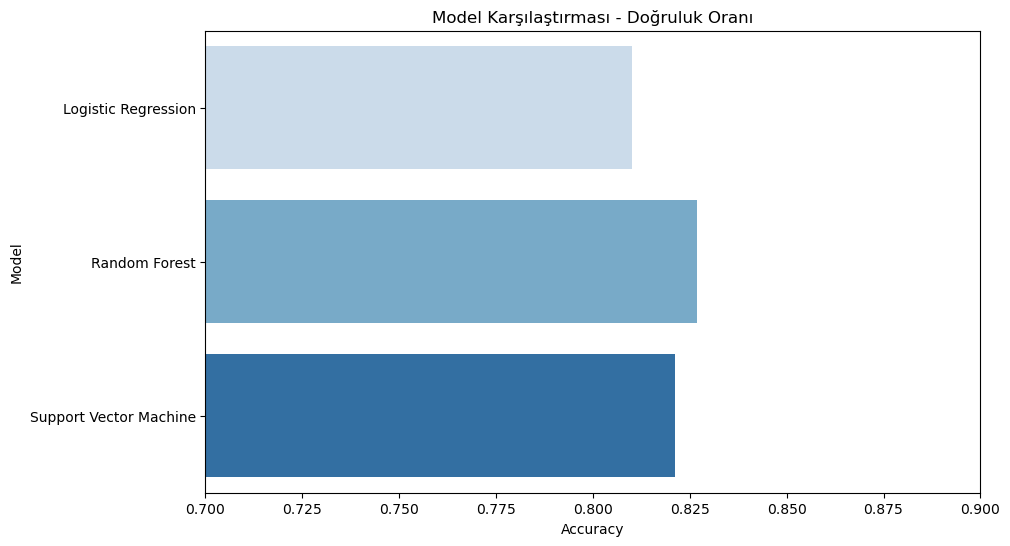

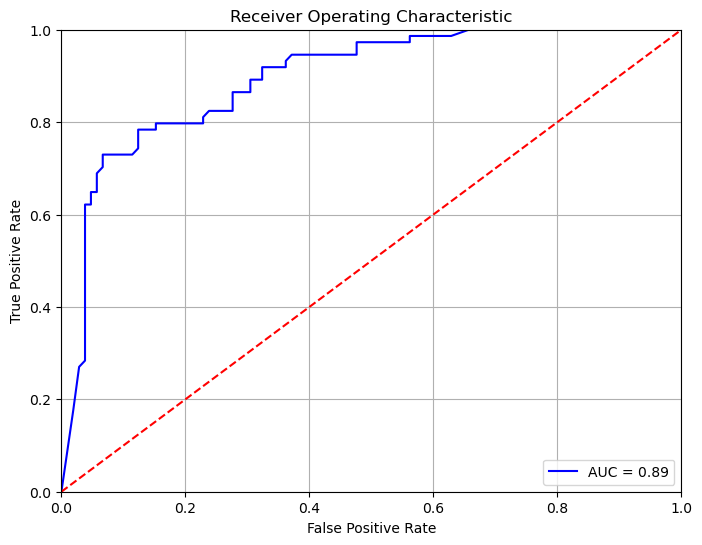

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn Kütüphaneleri (Makine Öğrenmesi için)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Modellerimiz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Veri Yükleme
# Veri direkt Seaborn kütüphanesinden yüklenecek
df = sns.load_dataset('titanic') # Titanic veri seti

# Gereksiz sütunları kaldırma
# deck => Çok fazla eksik veri var
# embark_town => embark sütunu zaten var
# alive => zaten pclass ve survived sütunları var
df.drop(['deck', 'embark_town', 'alive'], axis=1)

print(f"Veri Boyutu: {df.shape}") # Veri boyutunu yazdırma
print(df.head()) # İlk 5 satırı gösterme

# Özellik Mühendisliği ve Veri Ön İşleme
# Özellik 1: Aile Büyüklüğü (Family Size)
# sibsp : Kardeş/ Eş sayısı, parch: Ebeveyn/Çocuk sayısı + 1 (Kendisi)
df['familySize'] = df['sibsp'] + df['parch'] + 1 # Kendisi dahil aile büyüklüğü

# Özellik 2: Yalnız Mı? (Is Alone)
# Eğer ailesi 1 kişiyse (sadece kendisi), yalnızdır.
df['IsAlone'] = 1
df.loc[df['familySize'] > 1, 'IsAlone'] = 0 # familySize 1'den büyükse 0 yap

print("---> 'FamilySize' ve 'IsAlone' sütunları eklendi.")

# Eksik Değerlerin Doldurulması
# Yaş sütunundaki eksik değerleri yaş ortalaması ile dolduralım
imputer = SimpleImputer(strategy='mean') # Ortalama ile doldurma stratejisi
df['age'] = imputer.fit_transform(df[['age']]) # age sütunundaki eksik değerleri doldurma

# 'embarked' (Biniş Limanı) boşsa en çok tekrar edenle (mode) doldur
if 'embarked' in df.columns:
    most_freq = df['embarked'].mode()[0] # En sık tekrar eden değer
    df['embarked'] = df['embarked'].fillna(most_freq) # Eksik değeri onunla doldur

# Encoding (Yazıyı Sayıya Çevirme)
# Cinsiyet: male/female -> 0/1 (Label Encoding uygundur çünkü 2 seçenek var)
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex']) # 0, 1

# One-Hot Encoding: embark (C, Q, S)
# drop_first = True ile Dummy Variable Trap önlenir ilk sütun atarız.
df = pd.get_dummies(df, columns=['embarked','class'], drop_first=True) # One-Hot Encoding

print("---> Eksik değerler dolduruldu ve encoding işlemleri tamamlandı.")

# Model Hazırlığı
# Hedef değişken: survived
# Gereksiz kategorik sütunları da kaldıralım    
X = df.drop(['survived', 'who', 'deck', 'embark_town', 'alive', 'alone'], axis=1) # Girdi değişkenleri
y = df['survived'] # Hedef değişken (1: Hayatta Kaldı, 0: Kalmadı)

# Veriyi eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # %20 test verisi

# Ölçeklendirme SVM ve LR için önemlidir
# StandardScaler kullanarak ölçeklendirme yapalım
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Eğitim verisini ölçeklendirme
X_test = scaler.transform(X_test) # Test verisini ölçeklendirme
print("---> Veri eğitim ve test setlerine ayrıldı ve ölçeklendirme yapıldı.")

# Modellerin Eğitimi ve Değerlendirilmesi
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state= 42),
    "Support Vector Machine": SVC(probability=True)
}

results = []

print("\nModel Değerlendirme Sonuçları:")

for model_name, model in models.items():
    
    model.fit(X_train, y_train) # Modeli eğitme
    y_pred = model.predict(X_test) # Test verisi üzerinde tahmin yapma

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    try:
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    except:
        auc = 0.5
    
    results.append({
        "Model": model_name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "AUC - ROC": auc
    })
    print(classification_report(y_test, y_pred, zero_division=0))

# Sonuçları DataFrame olarak gösterme
results_df = pd.DataFrame(results)
print("\nTüm Modellerin Karşılaştırması:")
print(results_df)

plt.figure(figsize=(10,6)) #10x6 boyutunda grafik
sns.barplot(x='Accuracy', y='Model',hue = 'Model', data=results_df, palette='Blues') # Doğruluk oranlarını gösterme
plt.title('Model Karşılaştırması - Doğruluk Oranı') # Başlık
plt.xlabel('Accuracy') # X ekseni
plt.ylabel('Model') # Y ekseni
plt.xlim(0.70,0.90) # X ekseni limiti
plt.show()

# ROC Eğrisi Çizimi (Random Forest Modeli için)
from sklearn.metrics import roc_curve

# Random Forest modelini al
rf_model = models['Random Forest']

# FPR ve TPR hesapla
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
rf_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % rf_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True)
plt.show()


### Veri Ölçekleme: Standardizasyon ve Normalizasyon

- Makine öğrenmesinde veriler farklı birimlerde olabilir (biri "Yaş" 0-100, diğeri "Gelir" 2000-50000). Eğer bunları eşitlemezsek, model sadece büyük sayılara odaklanır. (Maaşı daha önemli sanar ve yaşa bakmaz).
- İki yaygın yöntem vardır: Standardizasyon ve Normalizasyon.
##### Standardizasyon (Z-Score Normalization)
- Verinin ortalamasını 0, standart sapmasını 1 yapar. Genelde SVM, Logistic Regression ve KNN gibi modellerde kullanılır.
- Formül: z = (X - μ) / σ
- Avantajı: Aykırı değerlere (outliers) karşı daha dayanıklıdır.
- Deavantajı: Verinin dağılımını değiştirmez.
- Ne Zaman Kullanılır? Verinin normal dağıldığı durumlarda.
##### Normalizasyon (Min-Max Scaling)
- Veriyi 0 ile 1 arasına sıkıştırır. Genelde görüntü işleme veya derin öğrenmede kullanılır.
- Formül: X' = (X - Xmin) / (Xmax - Xmin)
- Avantajı: Veriyi belirli bir aralığa sıkıştırır.
- Deavantajı: Aykırı değerlere (outliers) karşı hassastır.
- Ne Zaman Kullanılır? Verinin belirli bir aralığa sıkıştırılması gerektiğinde.

### KNN (K-Nearest Neighbors) Algoritması
- Mantığı yeni bir veri geldiğinde, uzayda ona en yakın K tane komşusuna bakar. Komşuların çoğunluğu neyse, yeni veri de odur.
- Kritik Nokta: "Mesafe" ölçtüğünden (Örn: Öklidyen Mesafe), verilerin ölçeklendirilmiş olması gerekir. Aksi halde büyük ölçekli özellikler (örneğin gelir) küçük ölçekli özelliklerden (örneğin yaş) daha baskın olur.
- Yoksa maaşı 50000 olan kişiyi 51000 olanı çok uzak sanar, ama yaşı 30 olanla 40 olanı yakın sanır.
- Bu yüzden KNN kullanmadan önce mutlaka StandardScaler veya MinMaxScaler ile veriyi ölçeklendirmeliyiz.

### Naive Bayes (Gaussian NB)
- Mantığı "Bu özellikler görüldüğünde, bu sınıfın olma olasılığı nedir?" sorusunu cevaplar. (Bayes Teoremi)
- "Naive" denmes sebebiyse tüm özelliklerin birbirinden bağımsız olduğunu varsayar. (Gerçekte bu her zaman doğru değildir ama yine de iyi sonuç verir.)
- Kullanımı çok hızldırı ve genelde metin sınıflandırma (Spam tespiti gibi) görevlerinde etkilidir ya da baseline model olarak kullanılır.
- Dezavantajı ise karmaşık ilişkileri yakalayamaz.
- Ölçeklendirme gerektirmez çünkü olasılık hesaplaması yapar.


Veri Boyutu: (569, 31)


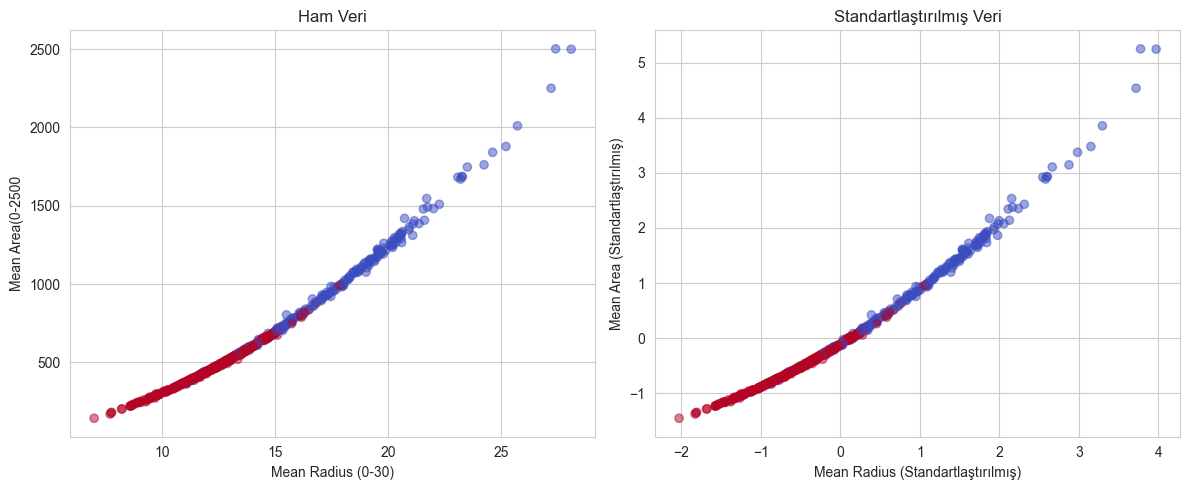


--- GÖRSEL YORUM ---
Soldaki grafikte Y ekseni (Alan) 2500'e kadar çıkarken X ekseni (Yarıçap) 30'da kalıyor.
KNN algoritması 'mesafe' ölçtüğü için, soldaki veride Yarıçapı görmezden gelir, sadece Alana bakar.
Sağdaki grafikte ise iki özellik de aynı ölçekte, model ikisini de eşit önemser.



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Veri Setini Yükleme (Breast Cancer Veri Seti)
# Bu veri setinde tümör özelliklerine (yarıçap, doku vb.) göre İyi Huylu ve Kötü Huylu tümörleri sınıflandıracağız.
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names) # Özellikler
df['target'] = data.target # Hedef değişken (0: Kötü Huylu, 1: İyi Huylu)

print(f"Veri Boyutu: {df.shape}") # Veri boyutunu yazdırma
# Sadece iki özelliğe odaklanalım ki görselleştirebilelim:
# 'mean radius' (Yarıçap - Küçük sayı) ve 'mean area' (Alan - Büyük sayı)
X_demo = df[['mean radius', 'mean area']]
y = df['target']

# Ölçekleme Önemi
# Ham veri vs Standartlaşmış Veri

scaler = StandardScaler() # StandardScaler nesnesi
X_demo_scaled = scaler.fit_transform(X_demo) # Veriyi ölçeklendirme

fig, axes = plt.subplots(1, 2, figsize= (12, 5))

# Grafik 1: Ham Veri
axes[0].scatter(X_demo['mean radius'], X_demo['mean area'], c=y, cmap='coolwarm', alpha = 0.5)
axes[0].set_title('Ham Veri')
axes[0].set_xlabel('Mean Radius (0-30)')
axes[0].set_ylabel('Mean Area(0-2500')
# Y ekseni çok büyük olduğu için noktalar dikeyde çok ayrık, yatayda sıkı olacaktır.
# Mesafeyi hesaplayan bir algoritma sadece "Alan"a bakacaktır.

# Grafik 2: Standartlaştırılmış Veri
axes[1].scatter(X_demo_scaled[:, 0], X_demo_scaled[:, 1], c=y, cmap='coolwarm', alpha = 0.5)
axes[1].set_title('Standartlaştırılmış Veri')
axes[1].set_xlabel('Mean Radius (Standartlaştırılmış)')
axes[1].set_ylabel('Mean Area (Standartlaştırılmış)')
# burada her iki eksen de eşit ağırlığa sahip.

plt.tight_layout()
plt.show()

print("\n--- GÖRSEL YORUM ---")
print("Soldaki grafikte Y ekseni (Alan) 2500'e kadar çıkarken X ekseni (Yarıçap) 30'da kalıyor.")
print("KNN algoritması 'mesafe' ölçtüğü için, soldaki veride Yarıçapı görmezden gelir, sadece Alana bakar.")
print("Sağdaki grafikte ise iki özellik de aynı ölçekte, model ikisini de eşit önemser.\n")



Model Doğruluk Sonuçları:
KNN (Ham Veri): 0.96 - Hatalı Sonuç
KNN (Ölçeklendirilmiş Veri): 0.95 - Doğru Sonuç
Naive Bayes: 0.97 - Ölçeklendirme Gerektirmez

 KNN Detaylı Rapor (Ölçeklendirilmiş Veri):
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



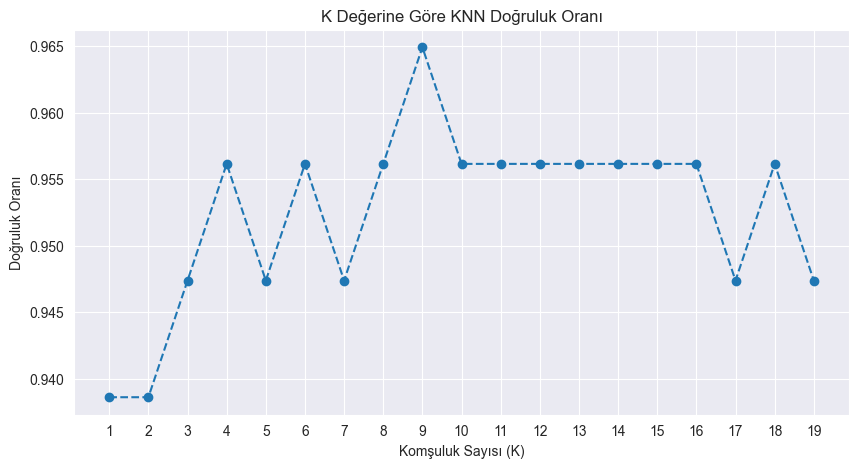

In [10]:
# Model Eğitimi ve Değerlendirme (CNN ve Naive Bayes)

X = df.drop('target', axis=1) # Girdi değişkenleri
y = df['target'] # Hedef değişken

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # %20 test verisi

# Senaryo A: Ölçeklendirme Yapmadan KNN (Hatalı Sonuç)
knn_raw = KNeighborsClassifier(n_neighbors=5) # KNN modeli (K=5)
knn_raw.fit(X_train, y_train) # Modeli eğitme
acc_raw = accuracy_score(y_test, knn_raw.predict(X_test)) # Doğruluk

# Senaryo B: Ölçeklendirme ile KNN (Doğru Sonuç)
scaler = StandardScaler() # StandardScaler nesnesi
X_train_scaled = scaler.fit_transform(X_train) # Eğitim verisini ölçeklendirme
X_test_scaled = scaler.transform(X_test) # Test verisini ölçeklendirme

knn_scaled = KNeighborsClassifier(n_neighbors=5) # KNN modeli (K=5)
knn_scaled.fit(X_train_scaled, y_train) # Modeli eğitme
acc_scaled = accuracy_score(y_test, knn_scaled.predict(X_test_scaled)) # Doğruluk

# Senaryo C: Naive Bayes (Ölçeklendirme Gerektirmez)
# Genelde ölçeklemeden etkilenmezken verinin dağılımına bağlı olarak performansı değişebilir.
nb_model = GaussianNB() # Naive Bayes modeli
nb_model.fit(X_train, y_train) # Modeli eğitme
acc_nb = accuracy_score(y_test, nb_model.predict(X_test)) # Doğruluk

# Sonuçları Yazdırma
print("Model Doğruluk Sonuçları:")
print(f"KNN (Ham Veri): {acc_raw:.2f} - Hatalı Sonuç")
print(f"KNN (Ölçeklendirilmiş Veri): {acc_scaled:.2f} - Doğru Sonuç")
print(f"Naive Bayes: {acc_nb:.2f} - Ölçeklendirme Gerektirmez")

print("\n KNN Detaylı Rapor (Ölçeklendirilmiş Veri):")
print(classification_report(y_test, knn_scaled.predict(X_test_scaled), zero_division=0))

# EKSTRA: En iyi K değerini bulmak (Hyperparameter Tunning - Basit Versiyon)
k_values = range(1, 20)
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    scores.append(accuracy_score(y_test, knn.predict(X_test_scaled)))

plt.figure(figsize=(10, 5))
plt.plot(k_values, scores, marker='o', linestyle = "--")
plt.title('K Değerine Göre KNN Doğruluk Oranı')
plt.xlabel('Komşuluk Sayısı (K)')
plt.ylabel('Doğruluk Oranı')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### StandardScaler (Standartlaştırma):
- Grafikte gördüğün gibi, verileri aynı birime getirmezsek "Mesafe" temelli modeller (KNN, SVM) büyük sayılara sahip sütunların kölesi olur. Küçük ama önemli sütunları (örn: yaş, yarıçap) görmezden gelir.
- Kural: KNN veya SVM kullanıyorsan, mutlaka *StandardScaler veya MinMaxScaler* kullan.

#### K-Nearest Neighbors (KNN):
- Basit, anlaşılır ama veri büyüdükçe yavaşlayan bir modeldir (Her tahmin için tüm veri setine olan mesafeyi ölçer - "Lazy Learner").
- Ölçekleme yapınca başarısının (Accuracy) nasıl arttığını kodda gördük (Genelde %92'den %96'lara fırlar).

#### Naive Bayes:
- Hızlıdır, ölçeklemeye çok ihtiyaç duymaz.
- Veri setimiz sayısal ve normal dağılıma yakın olduğu için GaussianNB kullandık.
- Genellikle "Referans Noktası" (Baseline) olarak iyidir.

#### K Değeri Seçimi:
- KNN'de n_neighbors (K) sayısı önemlidir.
- K çok küçükse (1) model gürültüye duyarlı olur (Overfitting).
- K çok büyükse model çok genelleştirir (Underfitting). Grafikle en iyi K değerini bulabilirsin (Genelde 3, 5, 7 gibi tek sayılar seçilir).

*Küçük bir not: Çıktıda "KNN (Ham Veri): 0.96" ve "KNN (Ölçeklendirilmiş): 0.95" çıkmış. Bazen veri setinin dağılımına göre ham veri şans eseri yüksek çıkabilir veya ölçekleme sonrası kenarda kalan bazı noktalar sınıf değiştirebilir. Ancak genel mühendislik kuralı değişmez: Mesafe bazlı algoritmalarda (KNN, SVM) ölçekleme şarttır. Yoksa model kararsız (unstable) olur.*

### Denetimli Öğrenme (Supervised Learning)
- Burada en popüler ve görsel olarak tatmin edici olan Karar Ağaçlarını (Decision Trees) inceleyeceğiz.
- Kullandığımız Random Forest bu ağaçların topluluğudur (Ensemble Learning).
- KNN'in aksine burada veri ölçeklenmez.

Bu örnekte ise aynı veri setinden bakacağız:
- Mantığı "20 Soruluk Oyun" gibidir. Veriyi sınıflandırmak içib sürekli Evet/Hayır soruları sorar.
- Örnek: Tümör yarıçapı 15'ten büyük mü? Evet ise doku pürüzlü mü? Hayır ise iyi huylu deriz.
- Avantajıysa inanılmaz derece _açıklanabilir(Interpretable)_ olmasıdır.
- Çünkü modelin "Kanser" dediğini adım adım nedenleriyle izleyebilirsin.
- Dezavantajı ise ezberleme (Overfitting) yapma eğilimidir. Yani eğitim verisini çok iyi öğrenir ama yeni veride kötü performans gösterir.

Eğitim Doğruluğu: 1.00
Test Doğruluğu: 0.95


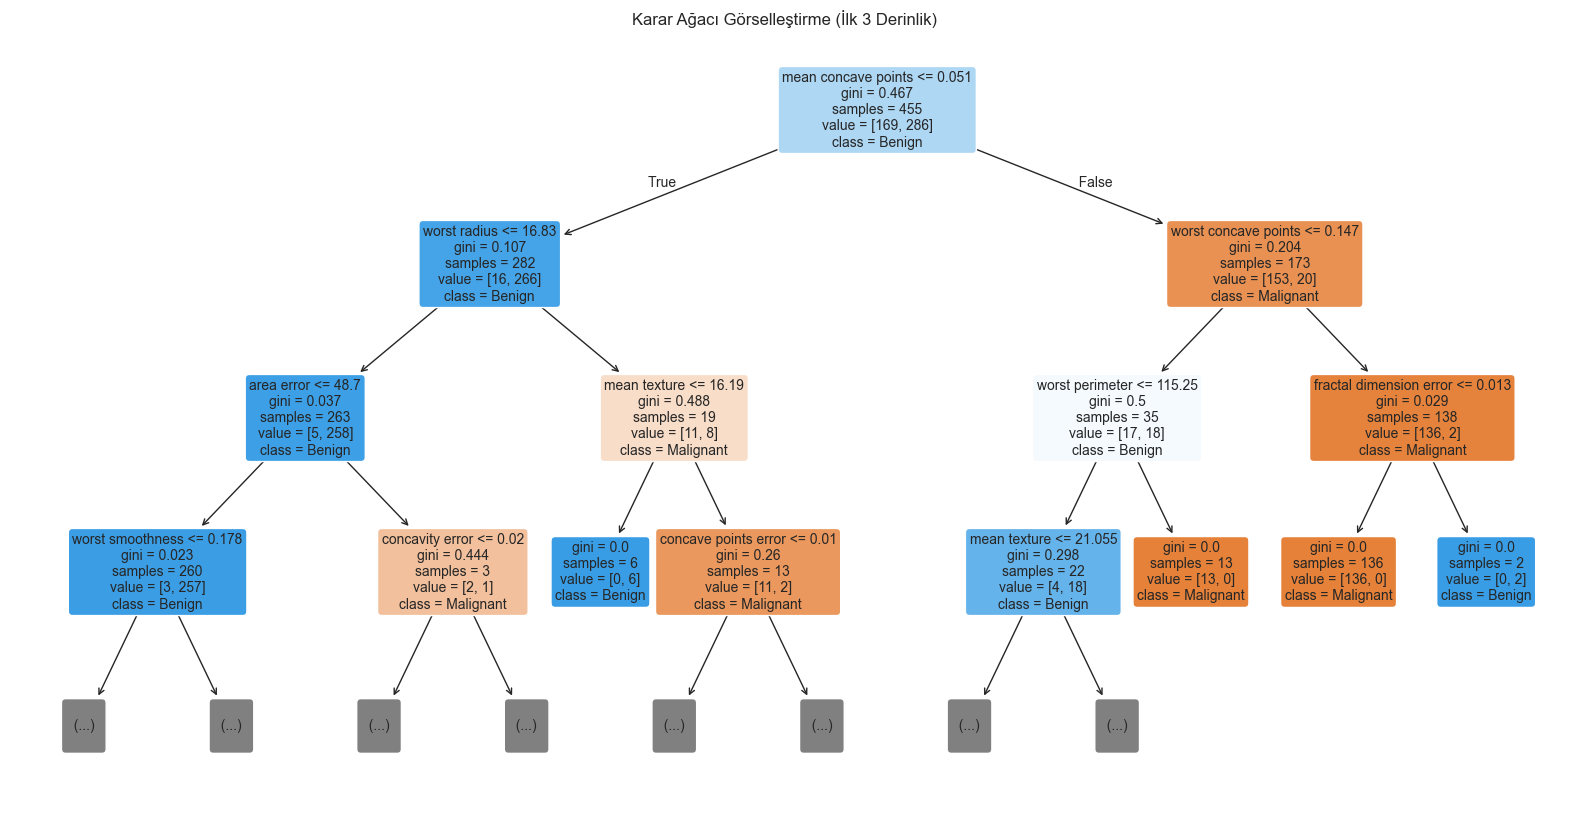


Budanmış (Pruned) Karar Ağacı Sonuçları:
Eğitim Doğruluğu: 1.00
Test Doğruluğu: 0.95


In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Modeli Hazırlamaca (Meme Kanseri Verisi)
# Scaling yapmıyoruz çünkü karar ağaçları ölçekleme gerektirmez
X = df.drop('target', axis=1) # Girdi değişkenleri
y = df['target'] # Hedef değişken
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # %20 test verisi

# Modeli Eğitelim (Sonsuz Derinlikte Karar Ağacı - Overfitting Yapabilir)
# max_depth parametresi ile derinliği sınırlayabiliriz
tree_model = DecisionTreeClassifier(random_state = 42)
tree_model.fit(X_train, y_train) # Modeli eğitme

# Başarı Skorlarına Bakalım
train_score = tree_model.score(X_train, y_train) # Eğitim skoru
test_score = tree_model.score(X_test, y_test) # Test skoru

print(f"Eğitim Doğruluğu: {train_score:.2f}") # Eğitim doğruluğu
print(f"Test Doğruluğu: {test_score:.2f}") # Test doğruluğu

# Ağacı Görselleştirelim
plt.figure(figsize=(20,10))
plot_tree(tree_model,
          feature_names= data.feature_names,
          class_names=['Malignant', 'Benign'],
          filled=True,
          rounded= True,
          fontsize=10,
          max_depth=3) # Sadece ilk 3 derinliği göster
plt.title('Karar Ağacı Görselleştirme (İlk 3 Derinlik)')
plt.show()

# Budama (Pruning) - Overfitting'i Engellemek
# Ağaca "En fazla 3 soru sorabilirsin" diyerek sınır koyalım.

pruned_tree = DecisionTreeClassifier(max_depth=3, random_state=42) # max_depth=3 ile sınırlandırma
pruned_tree.fit(X_train, y_train) # Modeli eğitme

print("\nBudanmış (Pruned) Karar Ağacı Sonuçları:")
print(f"Eğitim Doğruluğu: {train_score:.2f}") # Eğitim doğruluğu
print(f"Test Doğruluğu: {test_score:.2f}") # Test doğruluğu


### Çıktı Analizi (Neye Bakmalısın?)

#### Görseldeki Kutucuklar:
- En tepedeki kutu (Kök Düğüm): Modelin en önemli bulduğu özellik. Muhtemelen worst perimeter veya worst radius gibi bir şey çıkacaktır. Yani model diyor ki: "Kanser olup olmadığını anlamak için ilk bakmam gereken yer burası."
- gini: O kutudaki safsızlık (kirlilik) oranı. 0.0 olursa o kutudaki herkes aynı sınıftadır (tertemiz ayrım).
  + gini = 0.0 ise o kutudaki herkes aynı sınıftadır (Mükemmel ayrım).
  + gini = 0.5 ise yarı yarıya karışıktır (Karar vermek zor).
- samples: O kutuya düşen hasta sayısı.
- class: Modelin o noktadaki tahmini (Benign veya Malignant).

#### Overfitting (Aşırı Öğrenme) Kanıtı:
- İlk modelde Eğitim Seti Doğruluğu muhtemelen 1.0 (veya %100) çıkacaktır. Yani model, dersi ezberlemiş.
- Ama Test Seti Doğruluğu daha düşük (%93-94 gibi) çıkabilir.
- İkinci (Budanmış) modelde ise eğitim skoru düşer (ezber bozulur), ama test skoru genelde daha istikrarlı olur ve model daha güvenilirdir.